In [365]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, interpolate_background, sgolay2d
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

from skimage.morphology import disk
from skimage.filters import rank


#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib inline

In [122]:
x, y, z, T, t, settings = load_data("kante1")
x = x[0]
y = y[0]
settings = settings[0]
settings

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((3, 19, 0.1), (3, 19, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [123]:
x_bg, y_bg, z_bg, _, _, _ = load_data("background_anschlag")
x_bg = x_bg[0]
y_bg = y_bg[0]
z_bg = z_bg[0][0]

background = interpolate_background(x_bg, y_bg, z_bg, x, y)

0 1
0 2
0 3
1 2
1 3
2 3


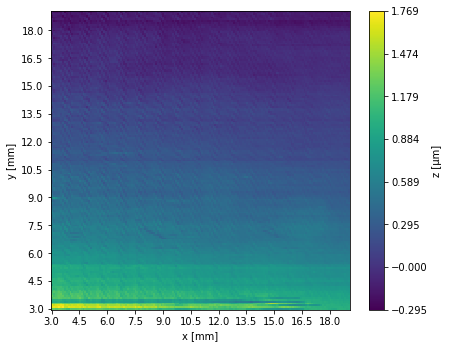

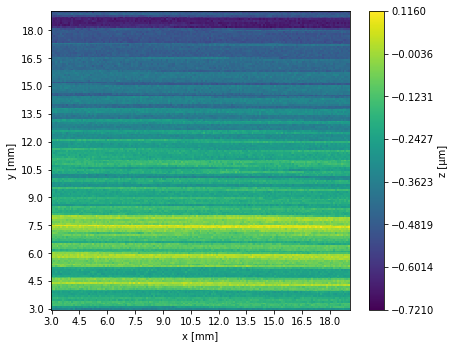

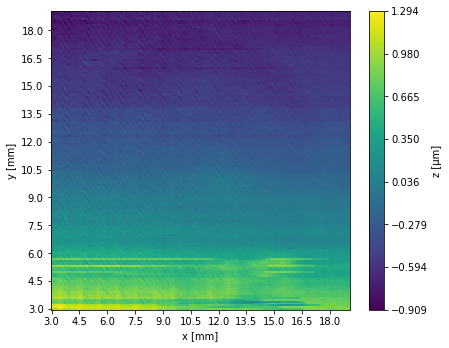

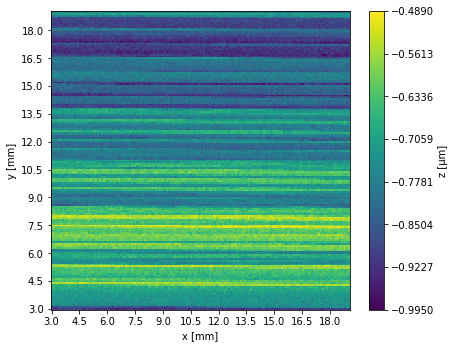

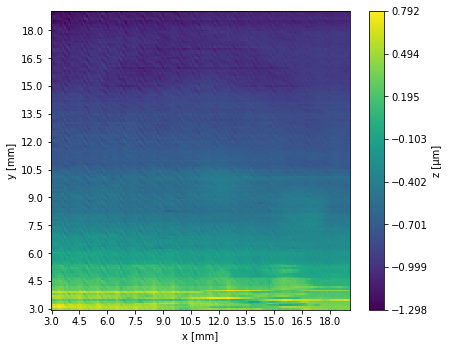

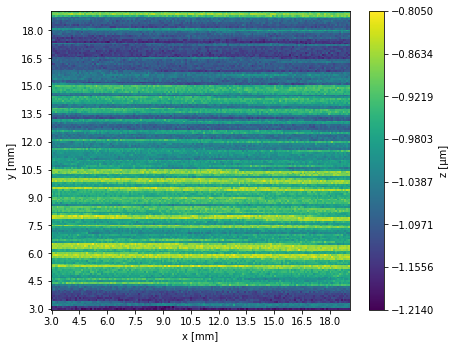

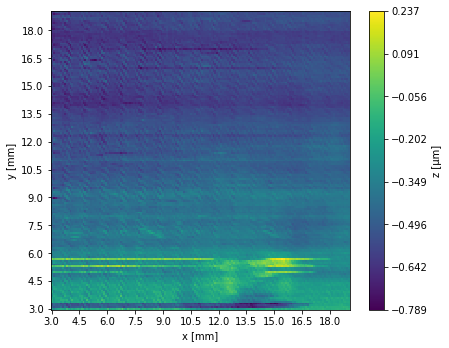

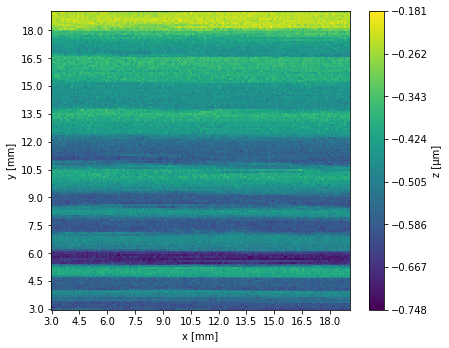

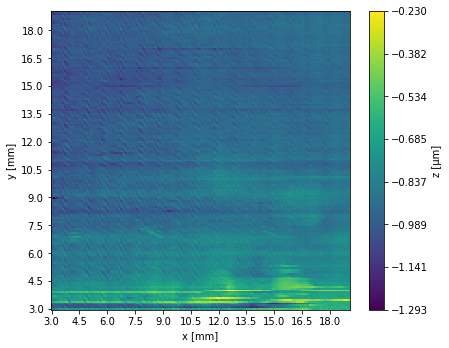

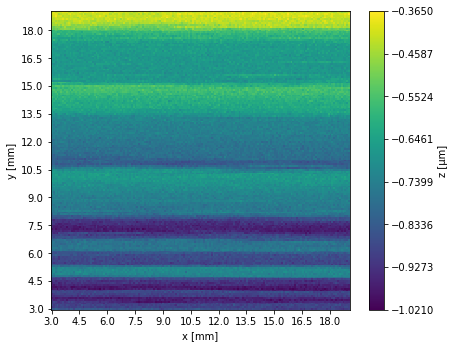

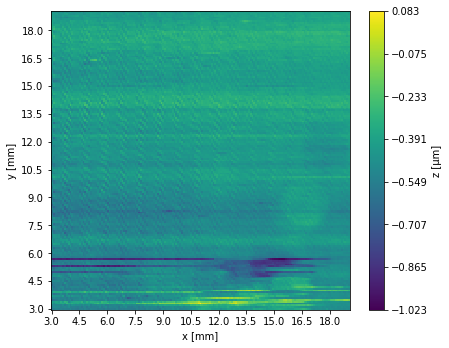

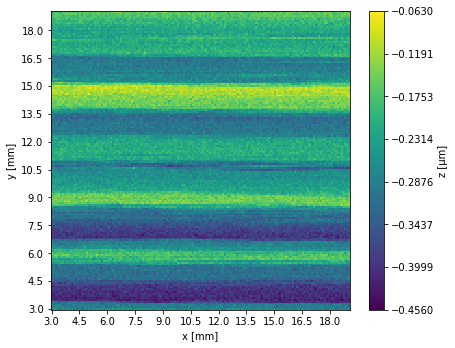

In [368]:
for i in range(len(z)):
    for j in range(i, len(z)):
        if i != j:
            print(i, j)
            plot(x, y, z[i][0] - z[j][0])
            plot(x, y, T[j] - T[i])

<IPython.core.display.Javascript object>


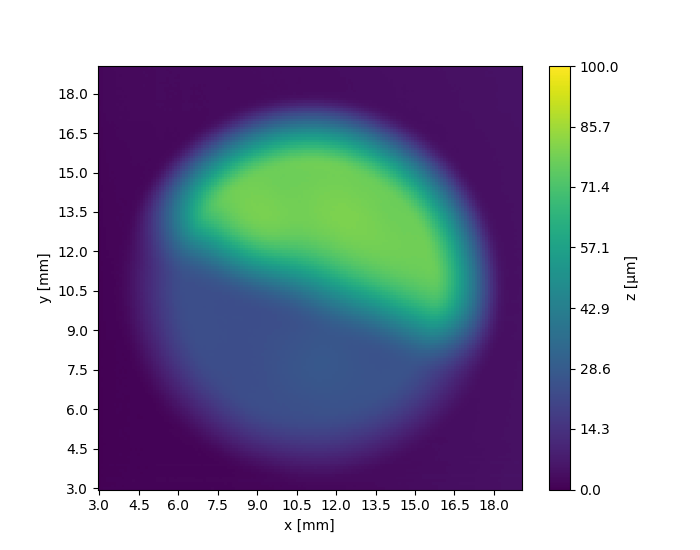

<IPython.core.display.Javascript object>


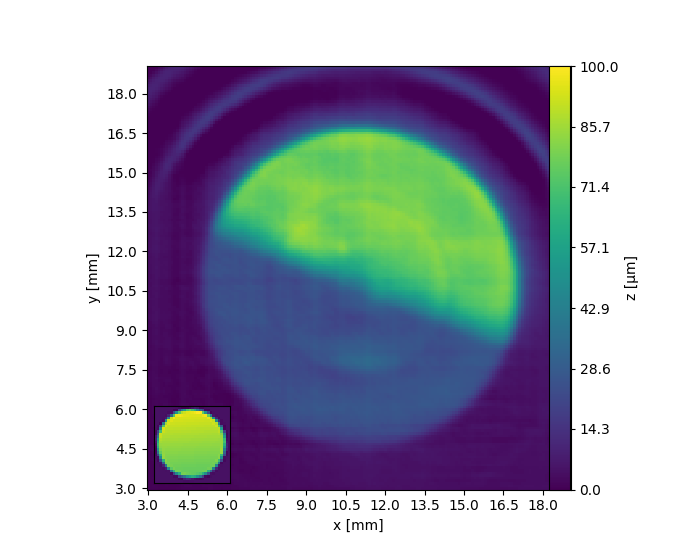

In [359]:
sensor = z[3][0]
signal = background - sensor
signal -= signal.min()

noise = detrend2D(z[3][0] - z[2][0])
#noise2 = noise.copy()
#np.random.shuffle(noise.flat)

limits = (0, 100)

plot(x, y, signal, limits=limits)
#plot(x, y, 0.5 * (noise + noise2))
#plot(x, y, noise2)

diameter = 2.57
sigma = 0
factor = 1
theta=0
phi=0
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, noise * 0.001, 1, extra=2)
#fig, ax = plot(x, y, z_reconstructed)#, psf=kernel)
#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 2)
#fig, ax = plot(x, y, z_reconstructed, limits=limits, psf=kernel)
#profile = ProfileBuilder(fig, ax)


diameter = 2.57
sigma = 0
factor = 1
theta=-1.5
phi=95
stepsize = settings['extent'][0][2]


selem = disk(2)


kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, 0.0005, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed, limits=limits, psf=kernel)

#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 2)
#profile = ProfileBuilder(fig, ax)


<IPython.core.display.Javascript object>


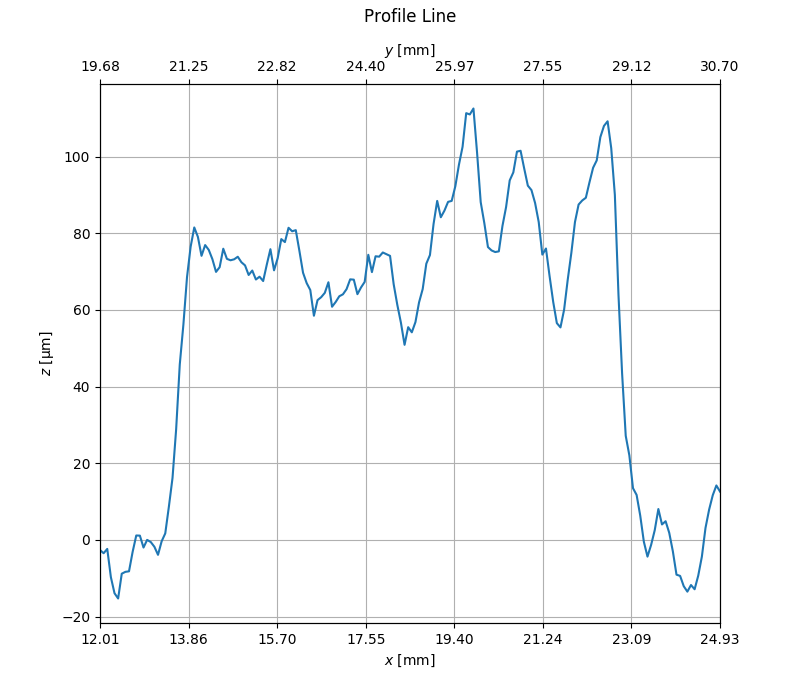

(<matplotlib.figure.Figure at 0x7f302d84bef0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f302dad36d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3031545080>))

In [7]:
plot_profile(x, y, z_reconstructed, *profile.coords)